<h1> Average Life Expectancy over Time (Year) by Districts

In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import pyodbc
import matplotlib.pyplot  as plt
import matplotlib.colors as mcolors
import numpy as np
mcolors.TABLEAU_COLORS

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

<h4> If the credentials not using WIndows Authentications

cnxn_str = ("DRIVER={ODBC Driver 17 for SQL Server};"
            "SERVER=localhost,1433;"
            "DATABASE=MassiveInfinity;"
            "UID=sa;"
            "PWD=Abcd1234!;")

In [3]:
cnxn_str = ("DRIVER={Sql Server Native Client 11.0};"
            "SERVER=DESKTOP-7HPUML6;"
            "DATABASE=MassiveInfinity;"
            "TRUSTED_CONNECTION=yes")

In [4]:
cnxn = pyodbc.connect(cnxn_str)

In [5]:
df_life_expectancy = pd.read_sql(
'SELECT p.District_Name, '
'[Neighborhood], '
'[2006-2010], '
'[2007-2011], '
'[2008-2012], '
'[2009-2013], '
'[2010-2014], '
'le.[Gender] '
'FROM [MassiveInfinity].[dbo].[life_expectancy] le '
'right join population p '
'on le.Neighborhood = p.Neighborhood_Name ', cnxn)

In [6]:
df_life_expectancy

,District_Name,Neighborhood,2006-2010,2007-2011,2008-2012,2009-2013,2010-2014,Gender
0,Ciutat Vella,el Raval,87.5,84.9,84.7,84.9,85.3,Female
1,Ciutat Vella,el Raval,77.9,75.1,75.7,76.2,76.5,Male
2,Ciutat Vella,None,NaN,NaN,NaN,NaN,NaN,None
3,Ciutat Vella,la Barceloneta,88.2,85.3,84.4,86.3,84.7,Female
4,Ciutat Vella,la Barceloneta,78.3,75.0,75.8,78.6,75.9,Male
...,...,...,...,...,...,...,...,...
119035,Sant Martí,None,NaN,NaN,NaN,NaN,NaN,None
119036,Sant Martí,None,NaN,NaN,NaN,NaN,NaN,None
119037,Sant Martí,None,NaN,NaN,NaN,NaN,NaN,None
119038,Sant Martí,None,NaN,NaN,NaN,NaN,NaN,None


In [7]:
df_life_expectancy = df_life_expectancy.fillna(value=np.nan)

In [8]:
df_life_expectancy

,District_Name,Neighborhood,2006-2010,2007-2011,2008-2012,2009-2013,2010-2014,Gender
0,Ciutat Vella,el Raval,87.5,84.9,84.7,84.9,85.3,Female
1,Ciutat Vella,el Raval,77.9,75.1,75.7,76.2,76.5,Male
2,Ciutat Vella,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ciutat Vella,la Barceloneta,88.2,85.3,84.4,86.3,84.7,Female
4,Ciutat Vella,la Barceloneta,78.3,75.0,75.8,78.6,75.9,Male
...,...,...,...,...,...,...,...,...
119035,Sant Martí,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,Sant Martí,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119037,Sant Martí,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119038,Sant Martí,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_life_expectancy.Neighborhood.fillna(value='Unknown', inplace=True)

In [10]:
df_life_expectancy

,District_Name,Neighborhood,2006-2010,2007-2011,2008-2012,2009-2013,2010-2014,Gender
0,Ciutat Vella,el Raval,87.5,84.9,84.7,84.9,85.3,Female
1,Ciutat Vella,el Raval,77.9,75.1,75.7,76.2,76.5,Male
2,Ciutat Vella,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3,Ciutat Vella,la Barceloneta,88.2,85.3,84.4,86.3,84.7,Female
4,Ciutat Vella,la Barceloneta,78.3,75.0,75.8,78.6,75.9,Male
...,...,...,...,...,...,...,...,...
119035,Sant Martí,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
119036,Sant Martí,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
119037,Sant Martí,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
119038,Sant Martí,Unknown,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_life_expectancy['2006-2010'].fillna(df_life_expectancy['2006-2010'].mean(), inplace=True)
df_life_expectancy['2007-2011'].fillna(df_life_expectancy['2007-2011'].mean(), inplace=True)
df_life_expectancy['2008-2012'].fillna(df_life_expectancy['2008-2012'].mean(), inplace=True)
df_life_expectancy['2009-2013'].fillna(df_life_expectancy['2009-2013'].mean(), inplace=True)
df_life_expectancy['2010-2014'].fillna(df_life_expectancy['2010-2014'].mean(), inplace=True)

In [12]:
df_life_expectancy

,District_Name,Neighborhood,2006-2010,2007-2011,2008-2012,2009-2013,2010-2014,Gender
0,Ciutat Vella,el Raval,87.500000,84.90000,84.700000,84.900000,85.300,Female
1,Ciutat Vella,el Raval,77.900000,75.10000,75.700000,76.200000,76.500,Male
2,Ciutat Vella,Unknown,84.817347,82.47551,82.694898,83.229592,83.409,NaN
3,Ciutat Vella,la Barceloneta,88.200000,85.30000,84.400000,86.300000,84.700,Female
4,Ciutat Vella,la Barceloneta,78.300000,75.00000,75.800000,78.600000,75.900,Male
...,...,...,...,...,...,...,...,...
119035,Sant Martí,Unknown,84.817347,82.47551,82.694898,83.229592,83.409,NaN
119036,Sant Martí,Unknown,84.817347,82.47551,82.694898,83.229592,83.409,NaN
119037,Sant Martí,Unknown,84.817347,82.47551,82.694898,83.229592,83.409,NaN
119038,Sant Martí,Unknown,84.817347,82.47551,82.694898,83.229592,83.409,NaN


In [13]:
dfle = df_life_expectancy.groupby(['District_Name']).mean()

In [14]:
dfle

,2006-2010,2007-2011,2008-2012,2009-2013,2010-2014
District_Name,,,,,
Ciutat Vella,83.788192,80.953644,81.013557,81.932799,81.344143
Eixample,85.428850,83.025046,83.199536,83.393599,83.773545
Gràcia,84.629337,82.593878,83.036224,83.307398,83.577250
Horta-Guinardó,84.200227,82.025170,82.314966,83.320975,83.158556
Les Corts,86.666667,84.600000,84.866667,84.200000,85.833333
Nou Barris,84.152891,81.712585,81.890816,81.984099,82.417417
Sant Andreu,85.011224,82.779252,83.199150,84.004932,84.443167
Sant Martí,85.107434,82.746647,83.040671,83.584111,83.746714
Sants-Montjuïc,85.409621,82.832216,82.856414,84.211370,83.529857


In [15]:
dfle = dfle.T

In [16]:
dfle

District_Name,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi
2006-2010,83.788192,85.428850,84.629337,84.200227,86.666667,84.152891,85.011224,85.107434,85.409621,85.143469
2007-2011,80.953644,83.025046,82.593878,82.025170,84.600000,81.712585,82.779252,82.746647,82.832216,82.965102
2008-2012,81.013557,83.199536,83.036224,82.314966,84.866667,81.890816,83.199150,83.040671,82.856414,83.038980
2009-2013,81.932799,83.393599,83.307398,83.320975,84.200000,81.984099,84.004932,83.584111,84.211370,83.335918
2010-2014,81.344143,83.773545,83.577250,83.158556,85.833333,82.417417,84.443167,83.746714,83.529857,83.811800


In [17]:
dfle['Year']=dfle.index.str.slice(5, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


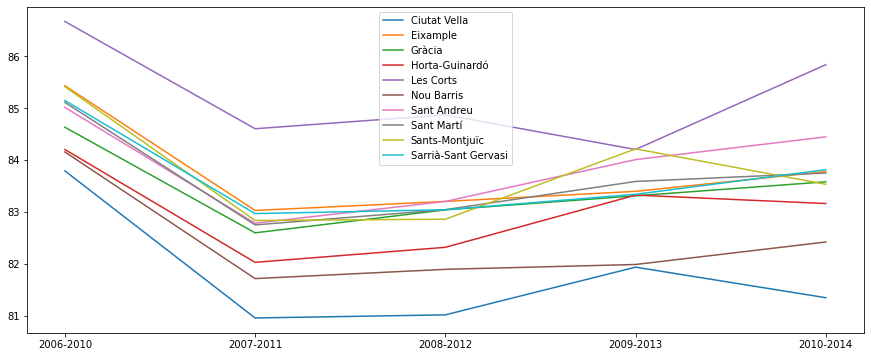

In [18]:
fig, ax = plt.subplots(figsize=(15,6))
ax.legend()
ax.plot(dfle.index, dfle['Ciutat Vella'], label = 'Ciutat Vella')
ax.plot(dfle.index, dfle['Eixample'], label = 'Eixample')
ax.plot(dfle.index, dfle['Gràcia'], label = 'Gràcia')
ax.plot(dfle.index, dfle['Horta-Guinardó'], label = 'Horta-Guinardó')
ax.plot(dfle.index, dfle['Les Corts'], label = 'Les Corts')
ax.plot(dfle.index, dfle['Nou Barris'], label = 'Nou Barris')
ax.plot(dfle.index, dfle['Sant Andreu'], label = 'Sant Andreu')
ax.plot(dfle.index, dfle['Sant Martí'], label = 'Sant Martí')
ax.plot(dfle.index, dfle['Sants-Montjuïc'], label = 'Sants-Montjuïc')
ax.plot(dfle.index, dfle['Sarrià-Sant Gervasi'], label = 'Sarrià-Sant Gervasi')
ax.legend()
plt.show()